# House price prediction for Indian market.
## Problem -
- Finding a house at reasonable price point in recent times can be very challenging, especially when there are many websites, often times people get very confused and physically visiting the area always time consuming and also not feasible everytime.
## Solution -
- We can make a model and interface which will provide pretty accurate assumption about price of House based on client needs like house condition, plot area, also which will work precisely on predicting the price of the house based on anywhere in India.
## drawbacks -
- While this model will provide almost accurate assumption about price of the house, but it will not be able to show the actual price of the certain house as well as it will not provide any visualization of the house or the location of the house like traditional webiste does for exaple housing.com, magicbricks.
## Challenges -
### Data Source -
- Finding data can be very challenging, web-scaping the from traditional website is risky and have many legal issues, so this model is built on top of open source available data, for this particular model i have taken a dataset from kaggle which is safe, open source and also very frequently used for datasets to train different models.
### Data Wrangling -
- This particular dataset had many issues like shape of the columns are different from each other,so I have transformed them all in same scale for accurate training of the model.
- Open source data often face problems when using it for training a model like they contain missing values,categorical values, which can cause errors when training model, so I have checked the data but I did not find any missing values as well as categorical values.
### Peforming EDA and Feature Engineering -
- In this dataset many columns have outliers, which can lead to an unstable model also while training the model faces problems of fitting the data by using boxplot the outliers can be visualized.I have removed the outliers and boxplot the data again, many columns have right skewed data, which can cause problems when fitting the data,so I have used function transformation with log transformation which fixes the right skewed data and makes it gaussian distribution.I have also used Standardization to bring all the column values in same scale for model to fit the data more easily,there are few column which cannot be tranformed or normalized because when performing tranformation the distribution gets worse,columns like 'Longitude','Lattitude','Postal Code' have been removed as they are having negative correlation with the price columns [Target].
- Remaining columns --
  [
                               'number of bedrooms', 'number of bathrooms', 'living area', 'lot area',
                                   'number of floors', 'waterfront present', 'number of views',
                                   'condition of the house', 'grade of the house',
                                   'Area of the house(excluding basement)', 'Area of the basement',
                                   'Built Year', 'Renovation Year', 'living_area_renov', 'lot_area_renov',
                                   'Number of schools nearby', 'Distance from the airport'
  ]
- Visualization helped a lot to understand the data correlation of each column with the price column by using scatter plot,heatmap.
- Also checked each column distributions as model always tend to work best on normally distributed data, for the I have used histplot.
### Final Outcome -
- After training the neural network model, I have managed to achieve 88.51% Accuracy on training,84.15% accuracy on Validation and 90.49% accuracy on test.
### Architecture of the model -
*
  
      Layer Number || Inputs in the layer || Outputs from the layer || Dropout Rate || Activation function in the layer || Batch Normalization ||

      Input layer    ||   17  || 200   ||  0.0 ||
  
      Hidden Layer 1 ||  200  ||  50   ||  0.1 ||  ReLu  ||  Yes
      
      Hidden Layer 2 ||  50   ||  150  ||  0.3 ||  ReLu  ||  Yes
      
      Hidden Layer 3 ||  150  ||  100  ||  0.2 ||  ReLu  ||  Yes

      Hidden Layer 4 ||  100  ||  50   ||  0.2 ||  ReLu  ||  Yes
  
      Hidden Layer 5 ||  50   ||  30   ||  0.1 ||  ReLu  ||  Yes
  
      Hidden Layer 6 ||  30   ||  20   ||  0.0 ||  ReLu  ||  Yes
  
      Output Layer   ||  20   ||  1    || 0.0  || Linear ||  No

      Loss Function for this model - SmoothL1Loss()

      Optimizer for this model - Adam()

      Weight Decay used with term - 0.004

      Learning Rate used - 3e-4

      No of epochs this model is trained - 500

      For this Model Two Classes were defined First was reusable architecture class called " HiddenLayer ",Second main Model class architecture called " HousePricePrediction ".

      -- Python Libraries used --

      [
        import torch
        import torch.nn as nn
        import torch.optim as optim
        import torchmetrics
        from sklearn.model_selection import train_test_split
        from sklearn.preprocessing import StandardScaler, FunctionTransformer
        from sklearn.compose import ColumnTransformer
        from sklearn.pipeline import Pipeline
        import pandas as pd
        import numpy as np
        import matplotlib.pyplot as plt
        import seaborn as sns
        from torch.utils.data import random_split, TensorDataset, DataLoader
      ]
      

In [79]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchmetrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from torch.utils.data import random_split,TensorDataset,DataLoader
import pickle

In [80]:
df=pd.read_csv("House Price India.csv")

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14619 non-null  int64  
 1   Date                                   14619 non-null  int64  
 2   number of bedrooms                     14619 non-null  int64  
 3   number of bathrooms                    14619 non-null  float64
 4   living area                            14619 non-null  int64  
 5   lot area                               14619 non-null  int64  
 6   number of floors                       14619 non-null  float64
 7   waterfront present                     14619 non-null  int64  
 8   number of views                        14619 non-null  int64  
 9   condition of the house                 14619 non-null  int64  
 10  grade of the house                     14619 non-null  int64  
 11  Ar

In [82]:
df.describe()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,1.461900e+04,14619.000000,14619.000000,14619.000000,14619.000000,1.461900e+04,14619.000000,14619.000000,14619.000000,14619.000000,...,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,1.461900e+04
mean,6.762821e+09,42604.546412,3.379233,2.129557,2098.156851,1.509369e+04,1.502326,0.007661,0.232848,3.430399,...,1970.929817,90.930228,122033.064300,52.792843,-114.403996,1996.641836,12754.003078,2.012244,64.951433,5.388063e+05
std,6.237162e+03,67.343747,0.938655,0.769955,928.218740,3.792089e+04,0.540241,0.087196,0.765651,0.664047,...,29.491743,416.230218,19.081451,0.137525,0.141325,691.078387,26059.234785,0.817312,8.936129,3.672294e+05
min,6.762810e+09,42491.000000,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,1900.000000,0.000000,122003.000000,52.385900,-114.709000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,6.762815e+09,42546.000000,3.000000,1.750000,1440.000000,5.010500e+03,1.000000,0.000000,0.000000,3.000000,...,1951.000000,0.000000,122017.000000,52.707600,-114.519000,1490.000000,5097.500000,1.000000,57.000000,3.200000e+05
50%,6.762821e+09,42600.000000,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,...,1975.000000,0.000000,122032.000000,52.806400,-114.421000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,6.762826e+09,42662.000000,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,...,1997.000000,0.000000,122048.000000,52.908900,-114.315000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,6.762832e+09,42734.000000,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,...,2015.000000,2015.000000,122072.000000,53.007600,-113.505000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


In [83]:
df=df.iloc[:,2:]
df=df.drop(columns=['Longitude','Lattitude','Postal Code'])


In [84]:
df.head()

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,4,2.50,2920,4000,1.5,0,0,5,8,1910,1010,1909,0,2470,4000,2,51,1400000
1,5,2.75,2910,9480,1.5,0,0,3,8,2910,0,1939,0,2940,6600,1,53,1200000
2,4,2.50,3310,42998,2.0,0,0,3,9,3310,0,2001,0,3350,42847,3,76,838000
3,3,2.00,2710,4500,1.5,0,0,4,8,1880,830,1929,0,2060,4500,1,51,805000
4,3,2.50,2600,4750,1.0,0,0,4,9,1700,900,1951,0,2380,4750,1,67,790000


In [85]:
df.describe()

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
count,14619.000000,14619.000000,14619.000000,1.461900e+04,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,14619.000000,1.461900e+04
mean,3.379233,2.129557,2098.156851,1.509369e+04,1.502326,0.007661,0.232848,3.430399,7.682263,1801.676654,296.480197,1970.929817,90.930228,1996.641836,12754.003078,2.012244,64.951433,5.388063e+05
std,0.938655,0.769955,928.218740,3.792089e+04,0.540241,0.087196,0.765651,0.664047,1.174917,833.737588,448.566731,29.491743,416.230218,691.078387,26059.234785,0.817312,8.936129,3.672294e+05
min,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,4.000000,370.000000,0.000000,1900.000000,0.000000,460.000000,651.000000,1.000000,50.000000,7.800000e+04
25%,3.000000,1.750000,1440.000000,5.010500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1951.000000,0.000000,1490.000000,5097.500000,1.000000,57.000000,3.200000e+05
50%,3.000000,2.250000,1930.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1580.000000,0.000000,1975.000000,0.000000,1850.000000,7620.000000,2.000000,65.000000,4.500000e+05
75%,4.000000,2.500000,2570.000000,1.080000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2240.000000,580.000000,1997.000000,0.000000,2380.000000,10125.000000,3.000000,73.000000,6.450000e+05
max,33.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,6110.000000,560617.000000,3.000000,80.000000,7.700000e+06


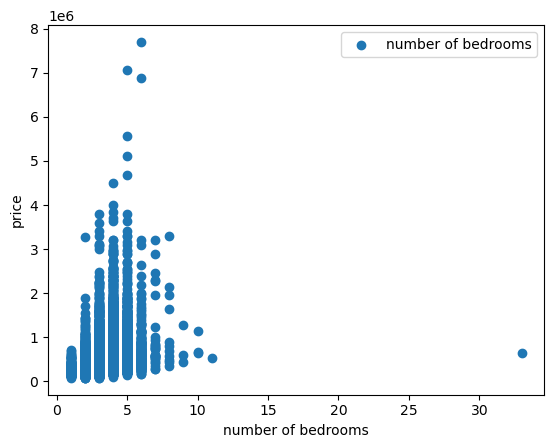

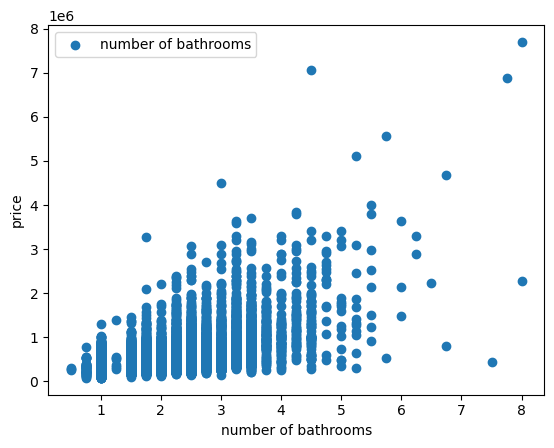

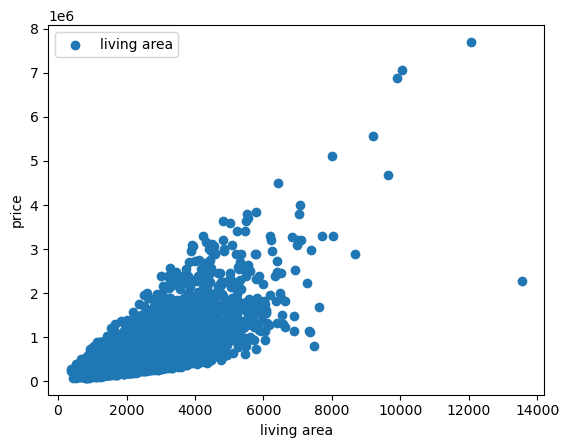

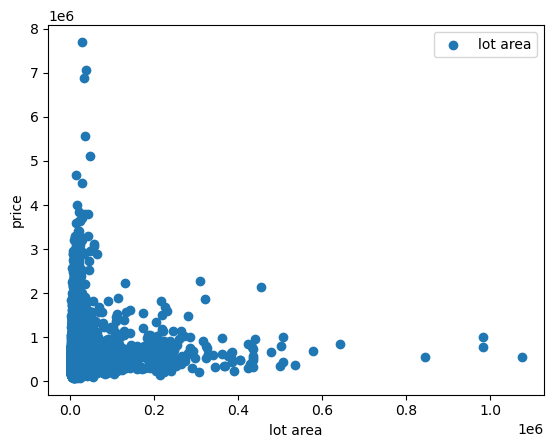

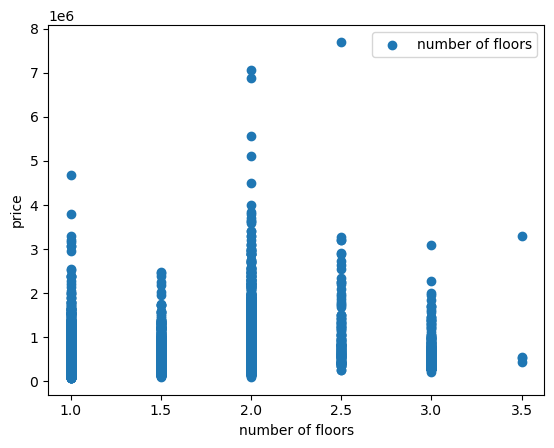

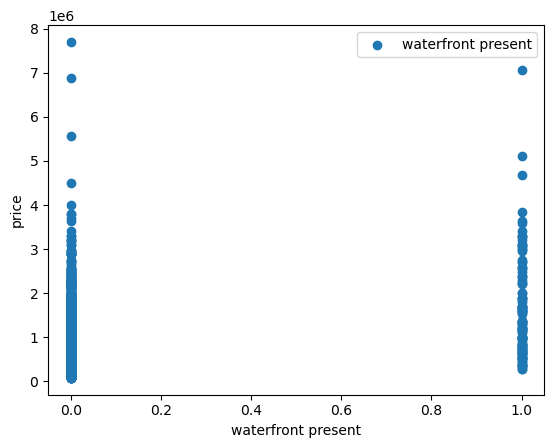

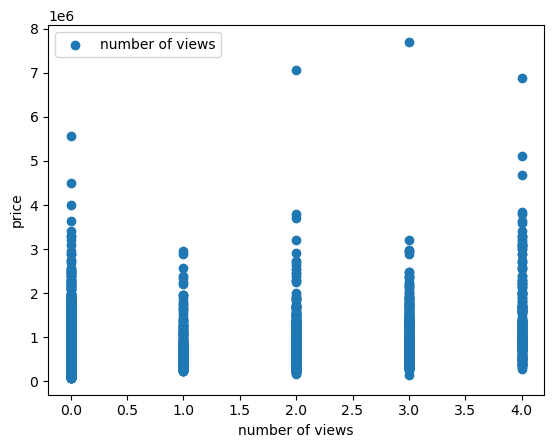

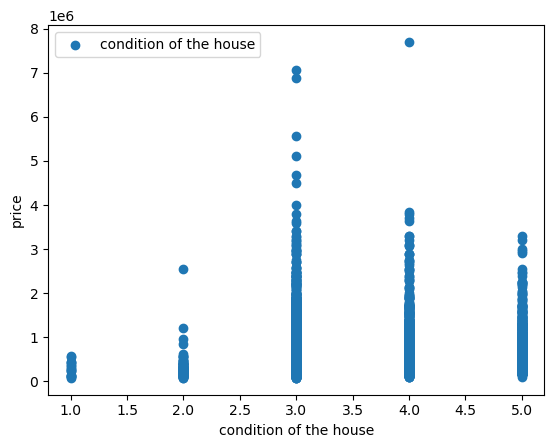

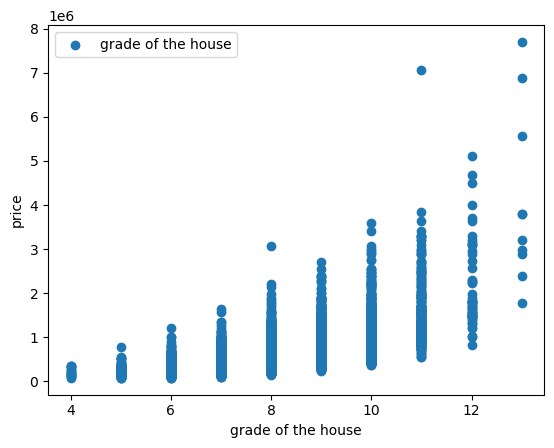

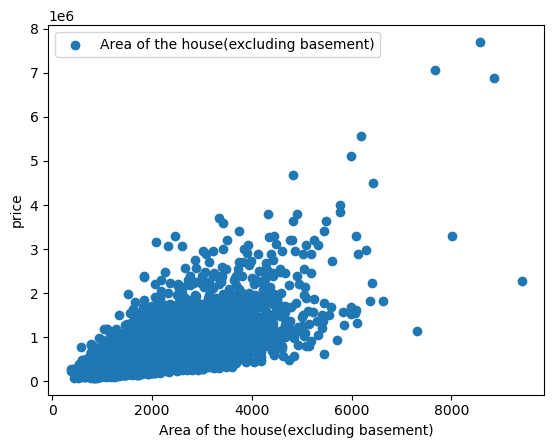

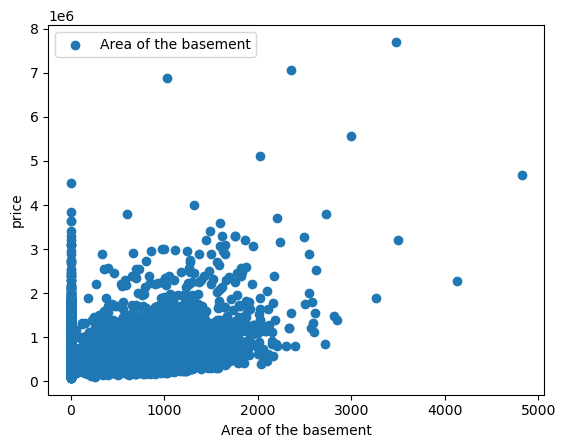

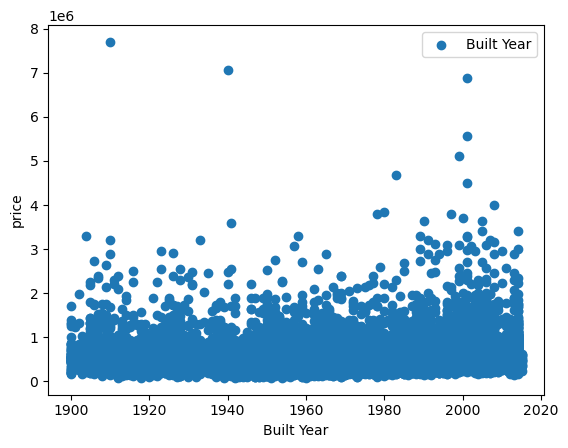

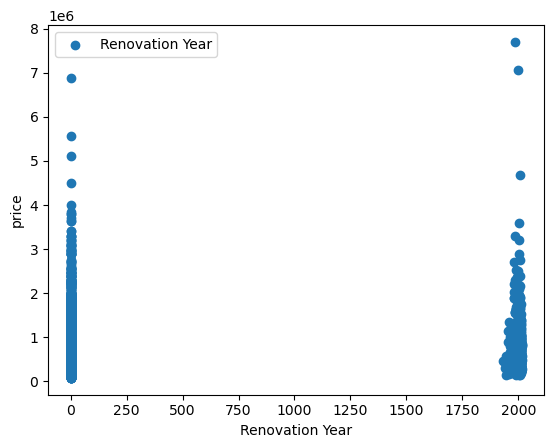

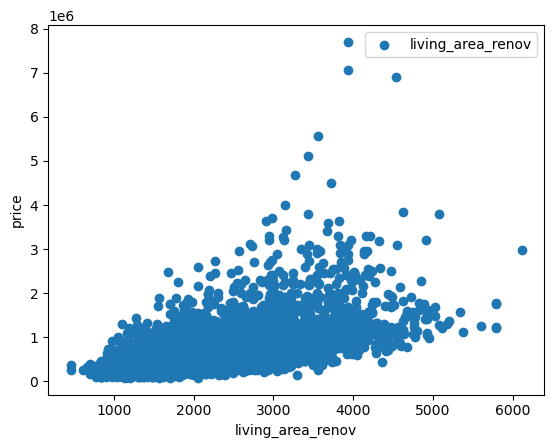

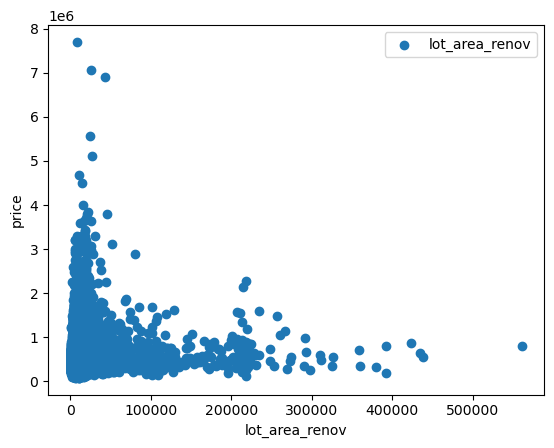

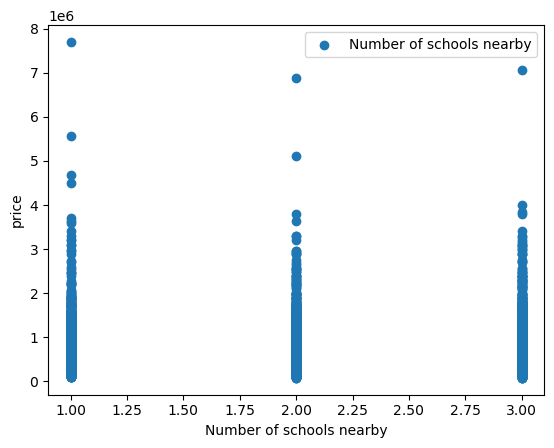

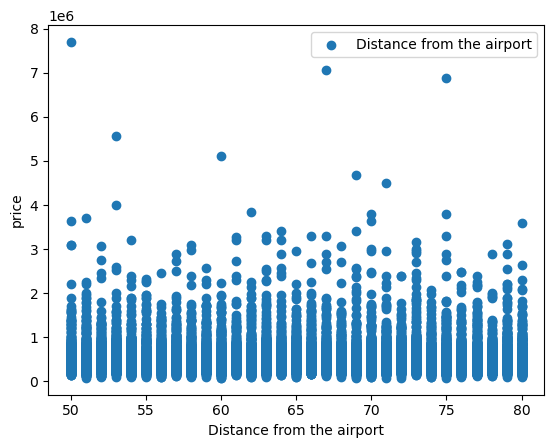

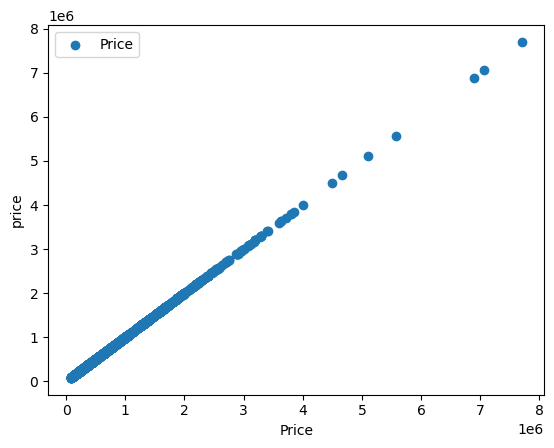

In [86]:
attributes=df.columns

for i in attributes:  
    x=df[i]
    y=df['Price']
    plt.scatter(x,y,label=f'{i}')
    plt.xlabel(f'{i}')
    plt.ylabel('price')
    plt.legend()
    plt.show()

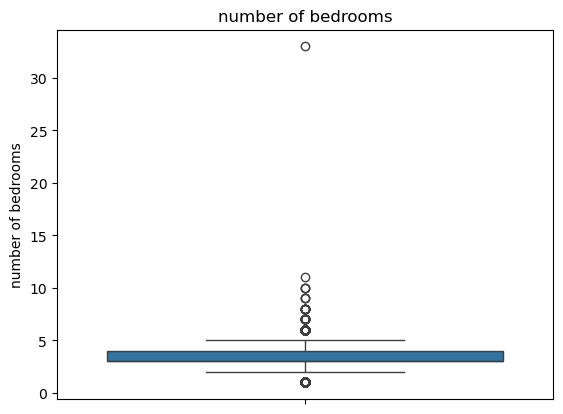

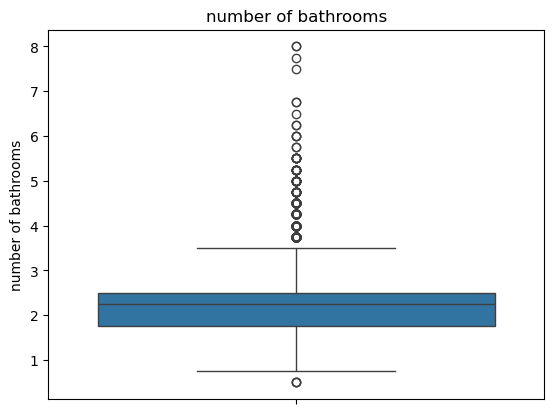

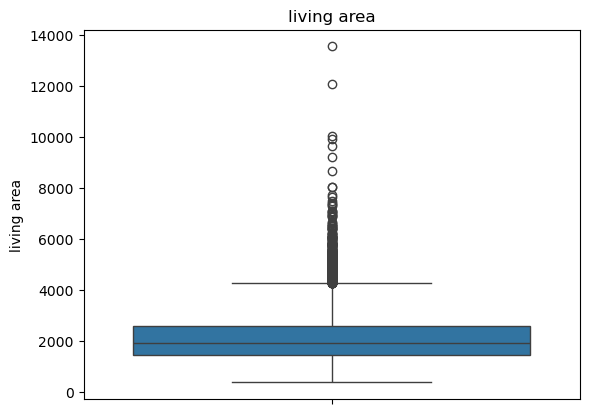

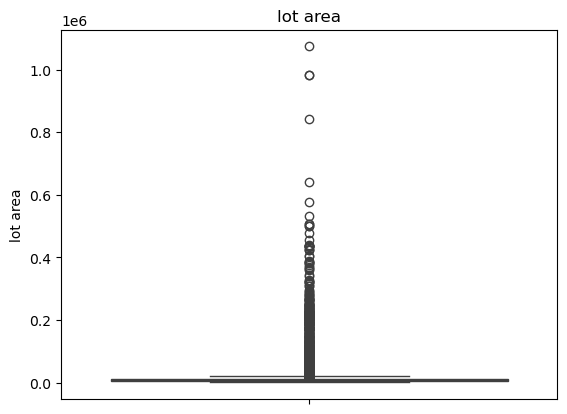

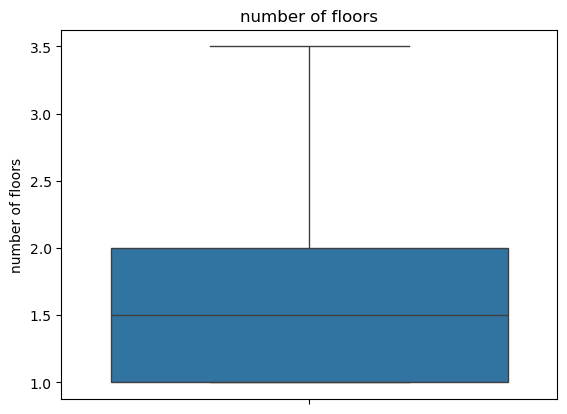

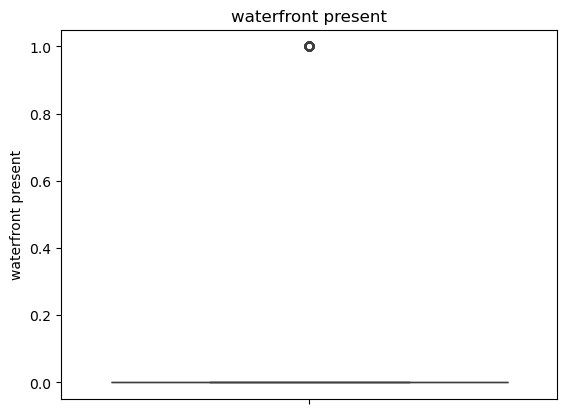

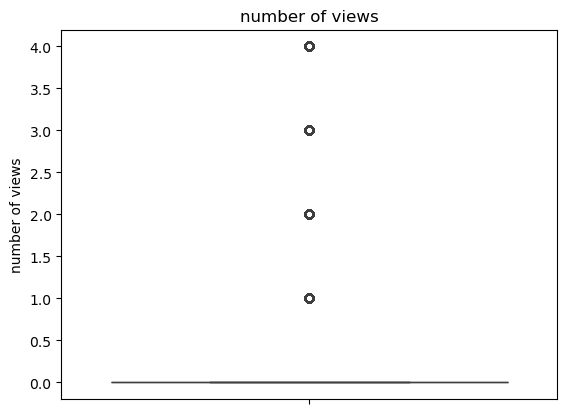

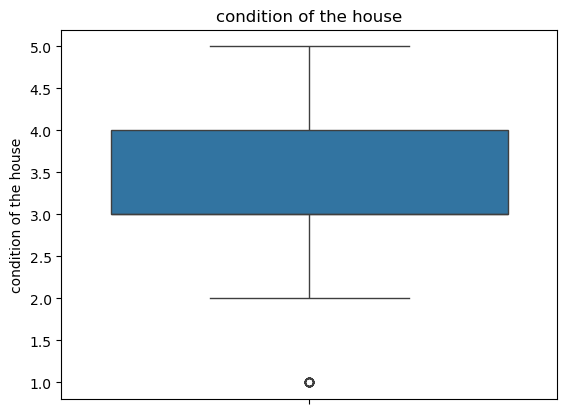

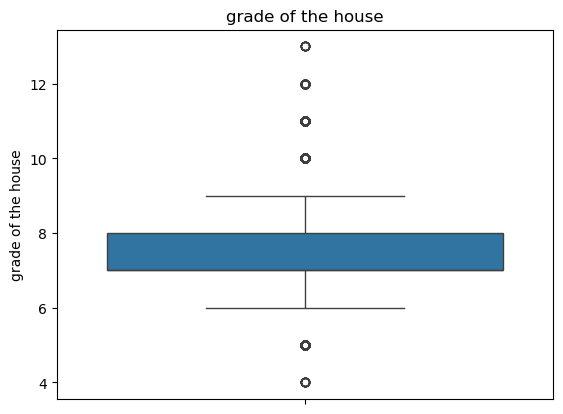

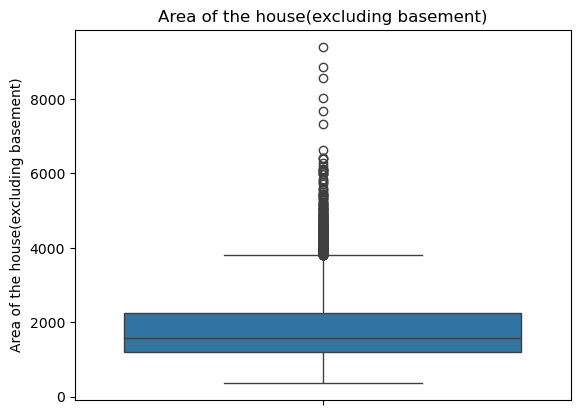

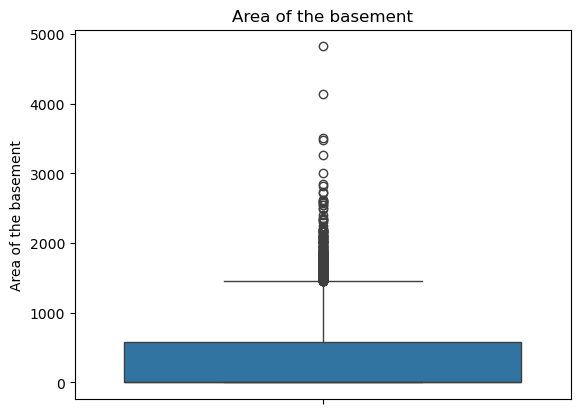

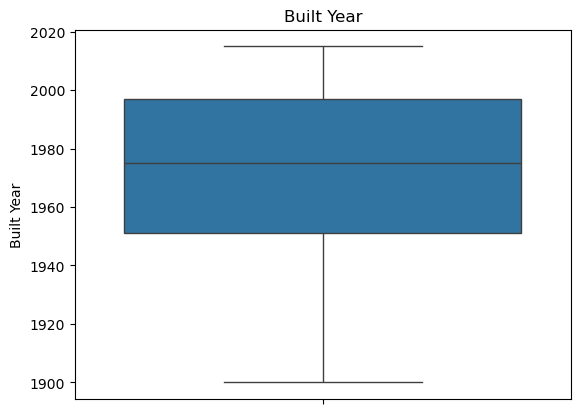

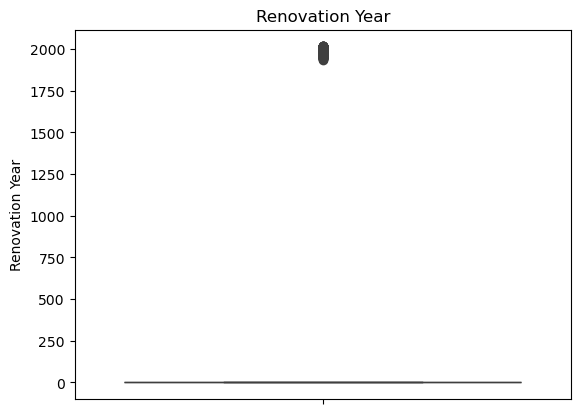

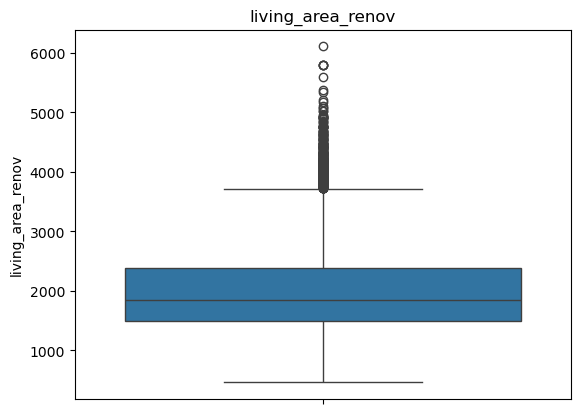

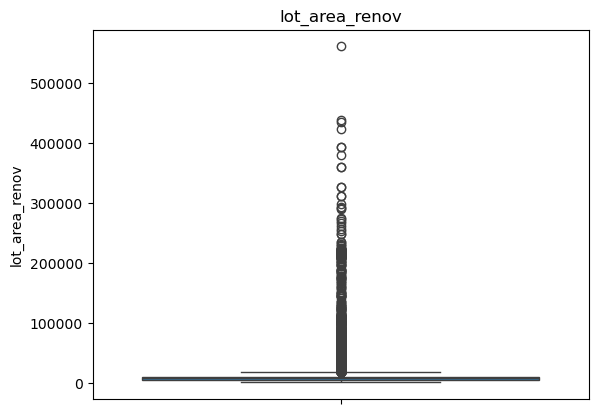

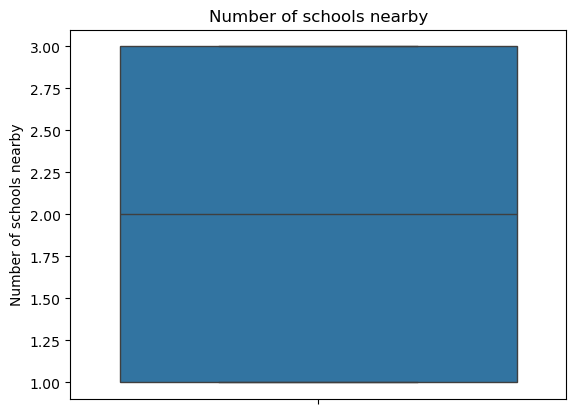

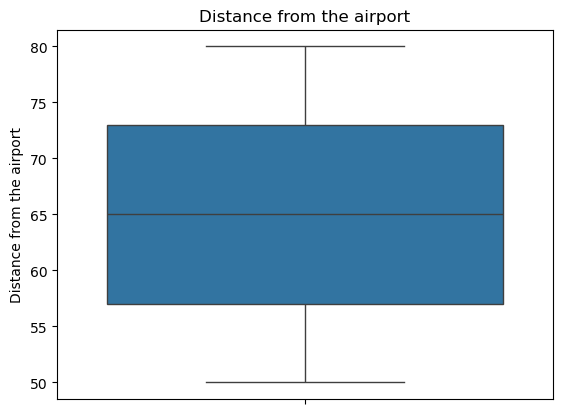

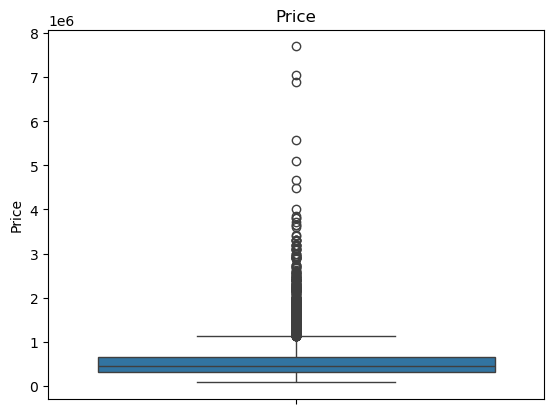

In [87]:
attributes=df.columns
for i in attributes:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()



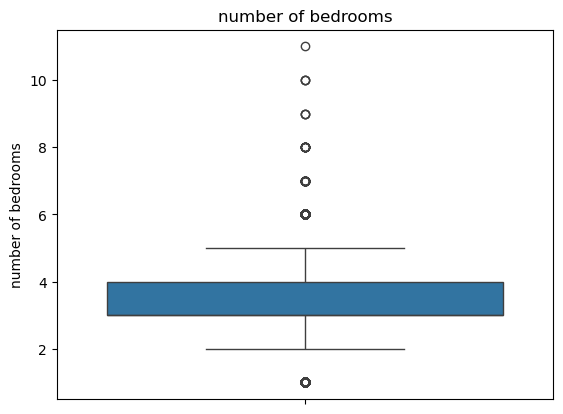

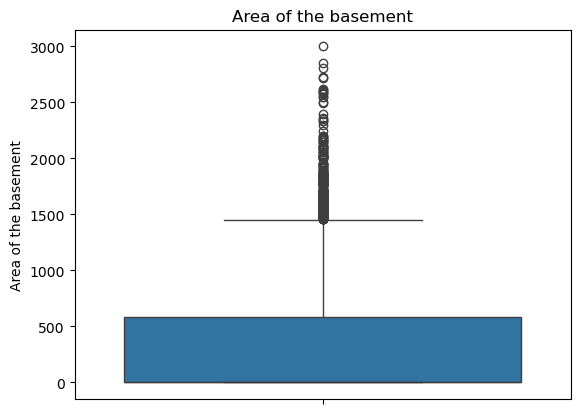

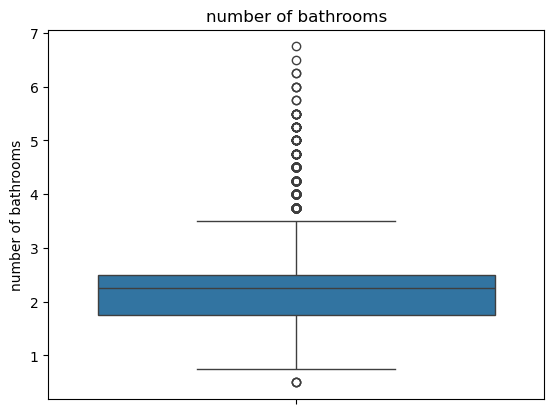

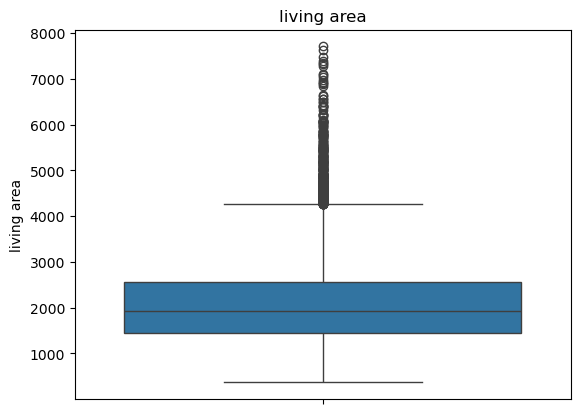

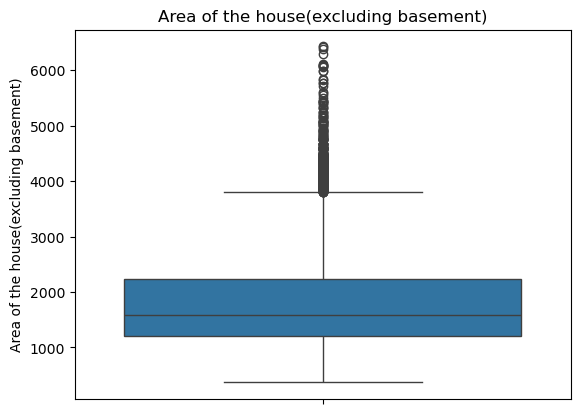

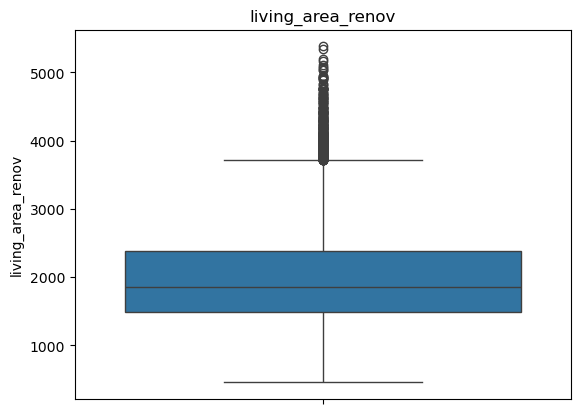

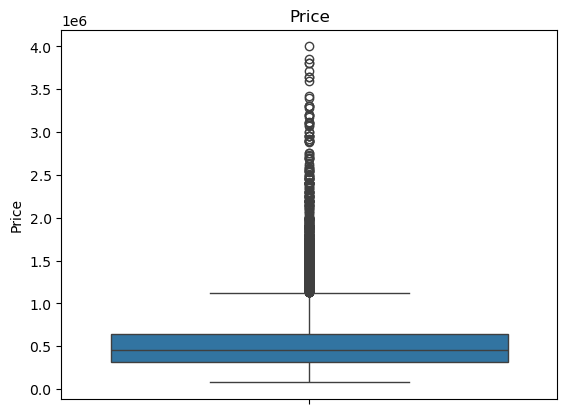

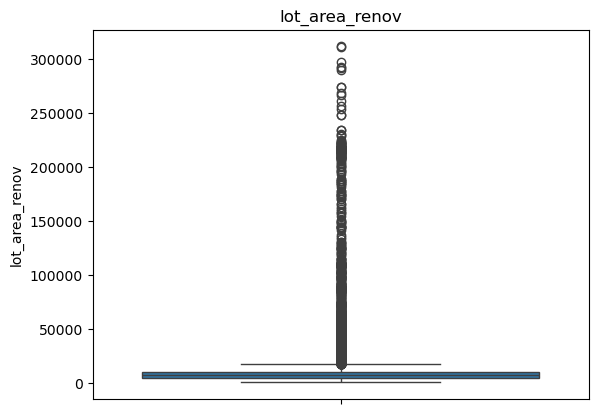

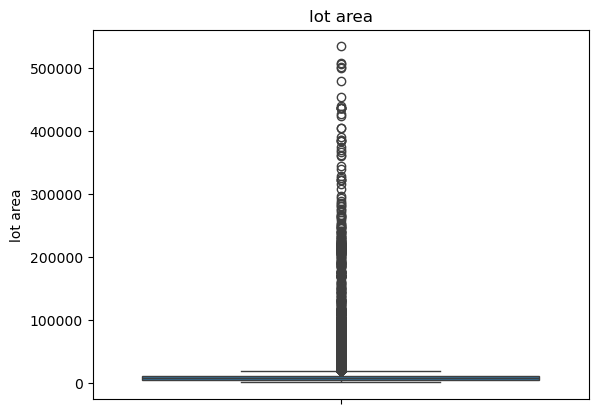

In [88]:

def remove_outliers(df,column,threshold):
    outliers=df[df[column]<=threshold]
    sns.boxplot(outliers[column])
    plt.title(column)
    plt.show()   
    return outliers
thresholds_column={'number of bedrooms':12,'Area of the basement':4000,'number of bathrooms':7,'living area':7900,'Area of the house(excluding basement)':6500,'Area of the basement':3500,
                      'living_area_renov':5500,'Price':4000000,'Area of the basement':3000,'lot_area_renov':320000,'lot area':580000,
                   
                  }
for column,thresholds in thresholds_column.items(): 
    df=remove_outliers(df,column,thresholds)


In [89]:
#Finding the correlation between price[target] column with other columns
correlation_matrix=df.corr(numeric_only=True)
correlation_matrix["Price"].sort_values(ascending=False)

Price                                    1.000000
living area                              0.700264
grade of the house                       0.681592
Area of the house(excluding basement)    0.603737
living_area_renov                        0.596054
number of bathrooms                      0.524620
number of views                          0.393039
number of bedrooms                       0.320618
Area of the basement                     0.311383
number of floors                         0.271357
waterfront present                       0.247106
Renovation Year                          0.126402
lot area                                 0.084611
lot_area_renov                           0.078885
Built Year                               0.051053
condition of the house                   0.047560
Number of schools nearby                 0.013192
Distance from the airport                0.006365
Name: Price, dtype: float64

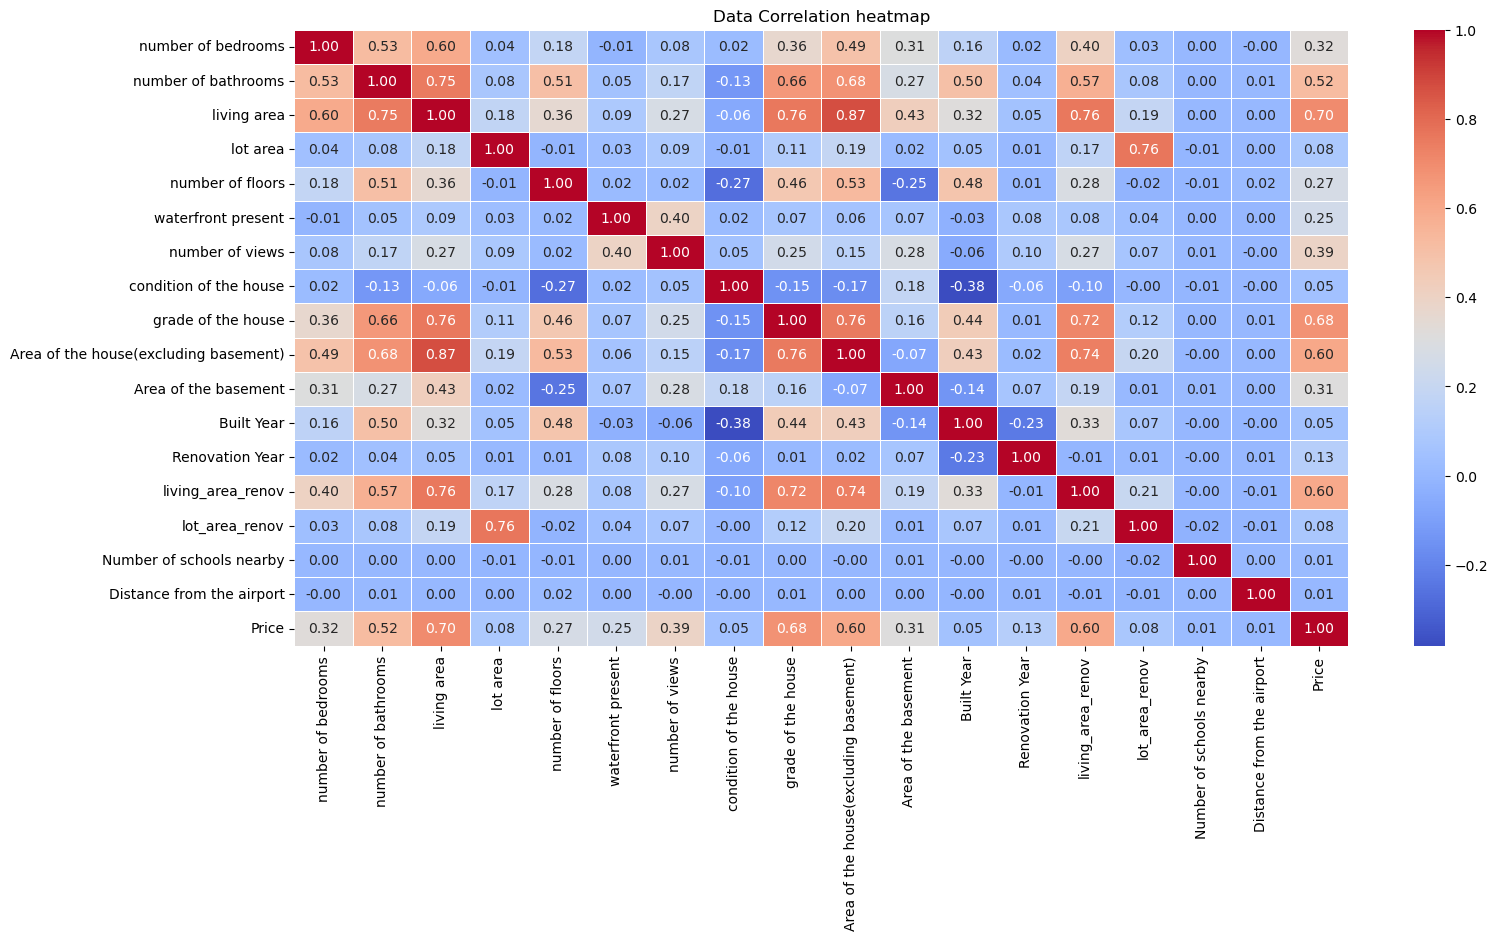

In [90]:
#showing the correlation heatmap
correlation_matrix=df.corr(numeric_only=True)
plt.figure(figsize=(17,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f", linewidths=0.4)
plt.title("Data Correlation heatmap")
plt.show()


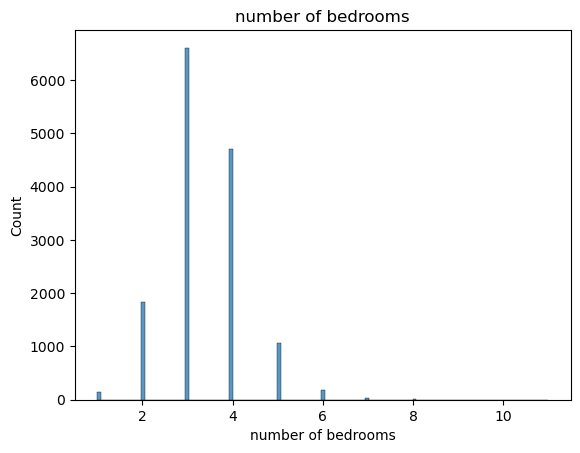

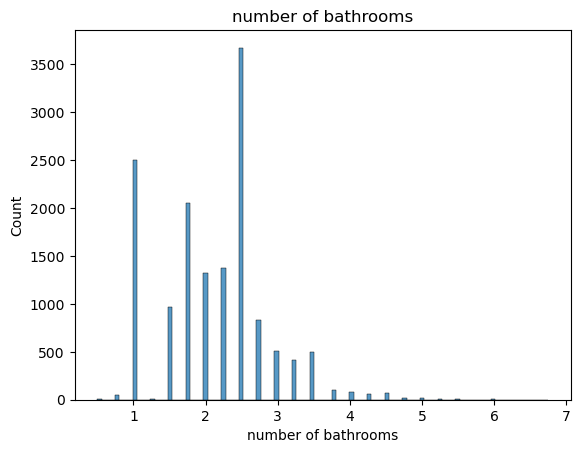

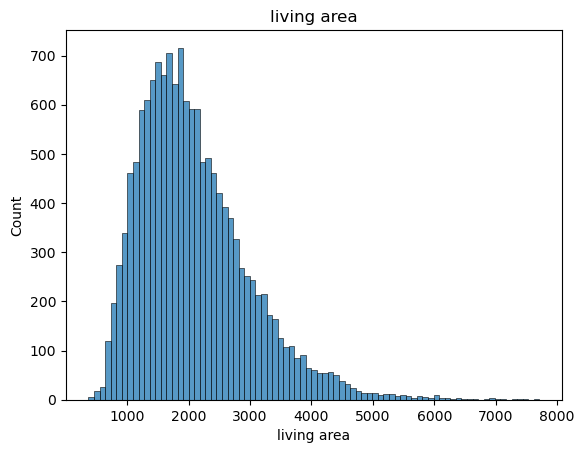

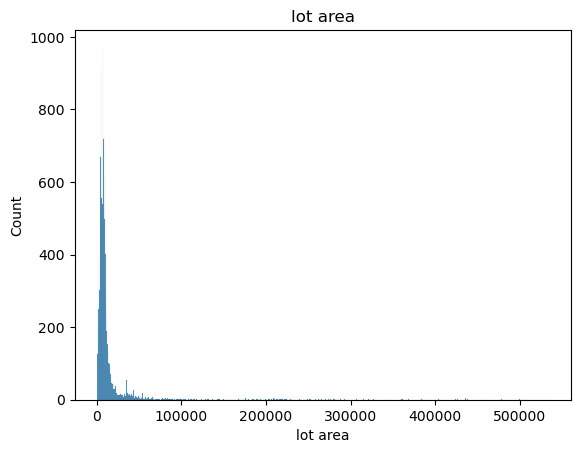

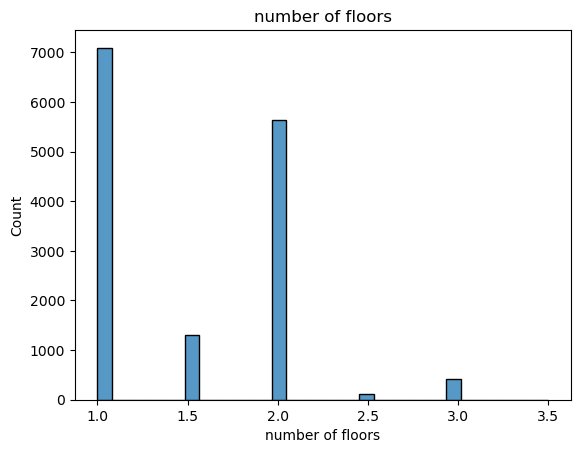

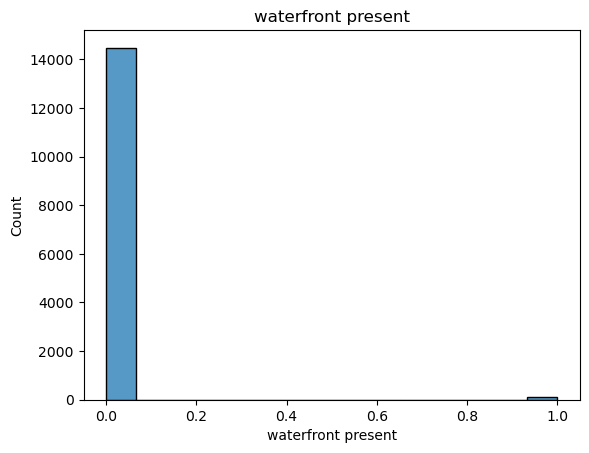

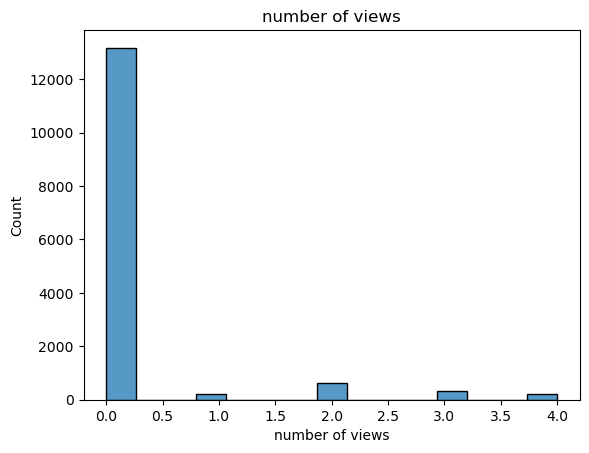

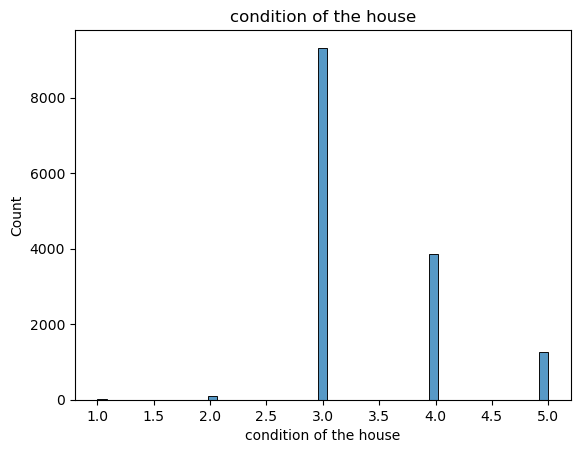

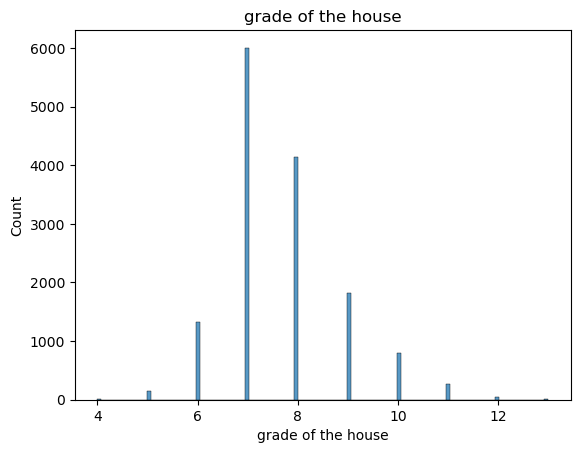

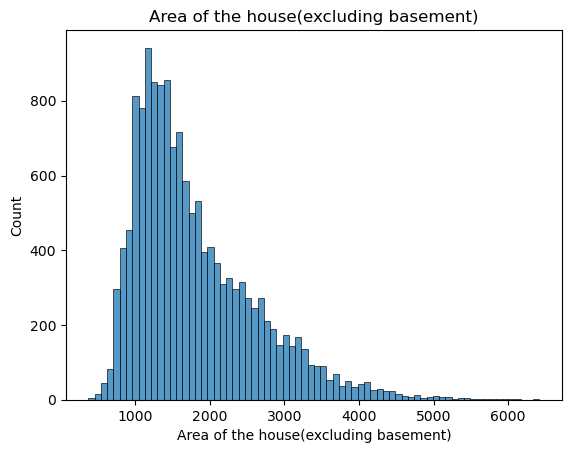

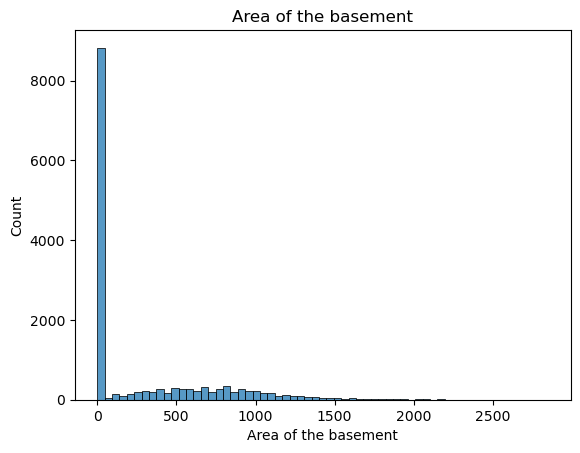

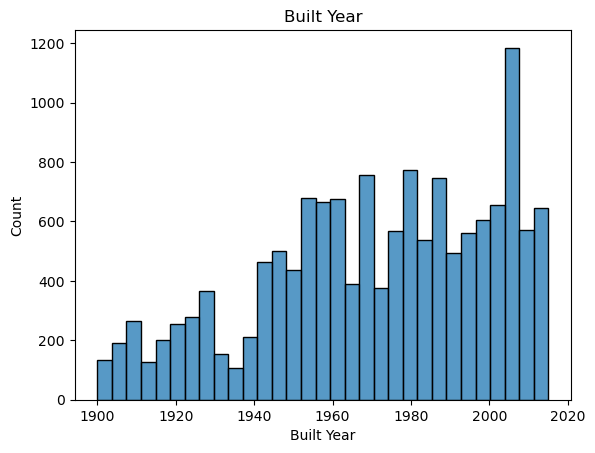

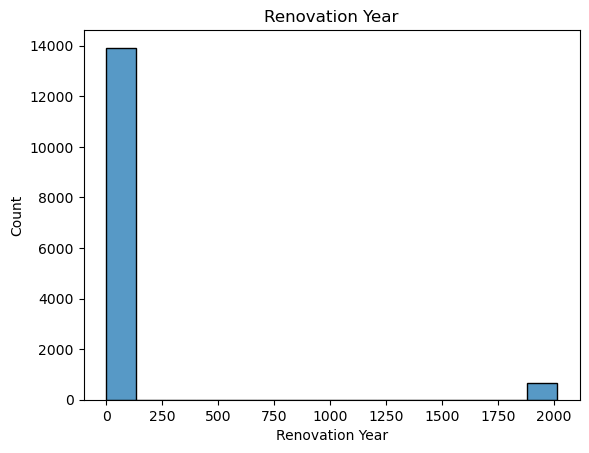

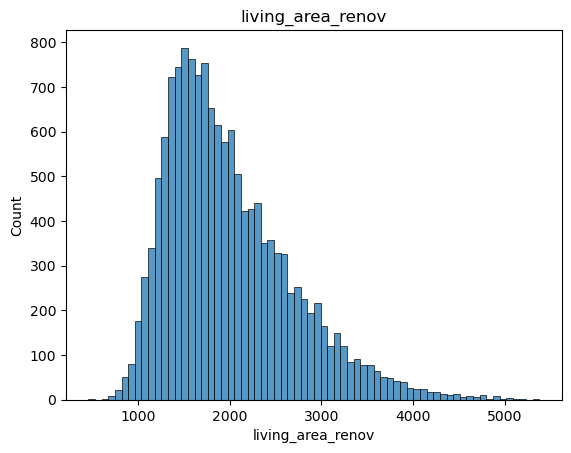

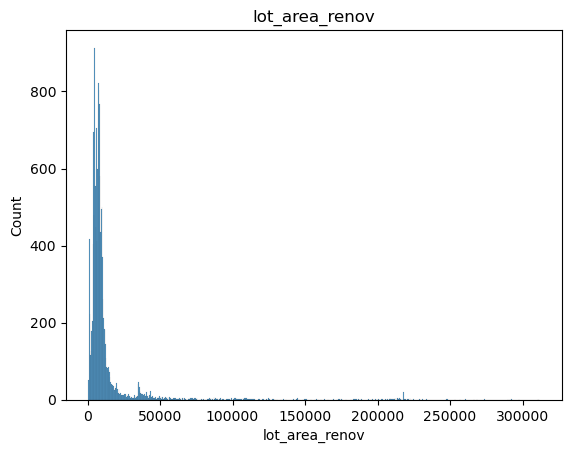

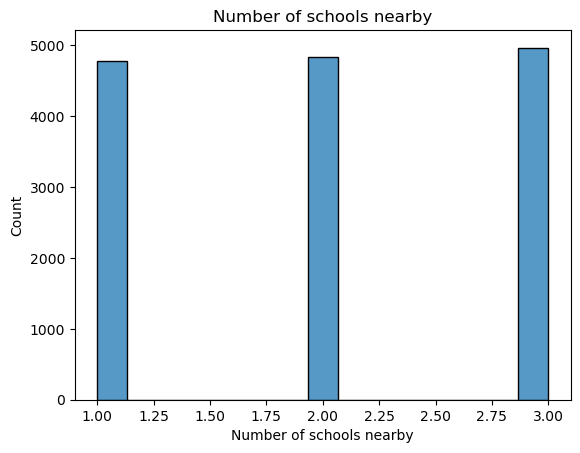

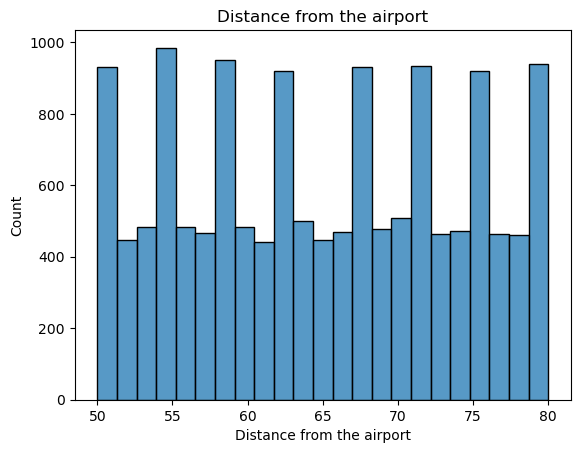

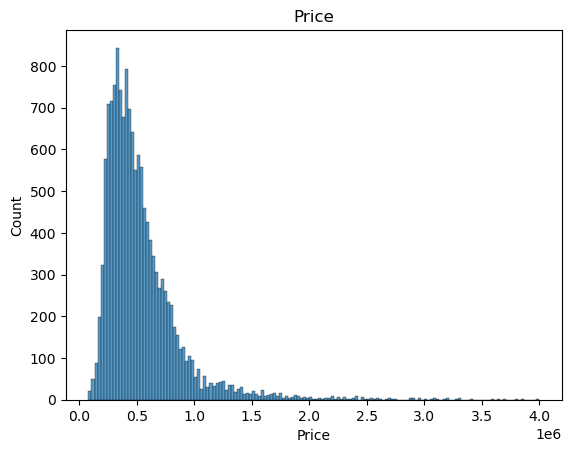

In [91]:
attributes=df.columns
for i in attributes:
    sns.histplot(df[i],bins='auto')
    plt.title(i)
    plt.show()

In [92]:
#checking skewed data
def skew_type(value, threshold=0.4):
    if value > threshold:
        return ('right skewed')
    elif value < -threshold:
        return ('left skewed')
    else:
        return 'approximately symmetric'

skewness = df.select_dtypes(include='number').skew()
skewness_types = skewness.apply(skew_type)

print(skewness_types)

number of bedrooms                                  right skewed
number of bathrooms                                 right skewed
living area                                         right skewed
lot area                                            right skewed
number of floors                                    right skewed
waterfront present                                  right skewed
number of views                                     right skewed
condition of the house                              right skewed
grade of the house                                  right skewed
Area of the house(excluding basement)               right skewed
Area of the basement                                right skewed
Built Year                                           left skewed
Renovation Year                                     right skewed
living_area_renov                                   right skewed
lot_area_renov                                      right skewed
Number of schools nearby 

In [93]:
#spliting the df into x,y dataframe and the value of Train/ Test dataset
x_train,x_test,y_train,y_test=train_test_split(df.iloc[:,:-1],df.iloc[:,-1:],test_size=0.3,random_state=42)
#further splitting into validation dataset from test set
x_test,x_val,y_test,y_val=train_test_split(x_test,y_test,test_size=0.3,random_state=43)


## Performing function transformation with log1p function, standardization to the features .

In [94]:

right_skewed=['number of bedrooms','number of bathrooms','living area','number of floors',
'grade of the house','Area of the house(excluding basement)',
'living_area_renov']
output=['Price']
       
#defined the function transformation with log1p function,standardization and pipeline for transforming the X columns
log_transformer_X=ColumnTransformer(transformers=[('log_transform_x',FunctionTransformer(np.log1p,feature_names_out='one-to-one'),right_skewed)],remainder='passthrough')
preprocessor_X=Pipeline(steps=[
    ('log_transform_x',log_transformer_X),
    ('standardization_x',StandardScaler())
])

#applying Standardization and  log function transformation on colX
preprocessor_X.fit(x_train)
x_train_transformed=preprocessor_X.transform(x_train)
x_test_transformed=preprocessor_X.transform(x_test)
x_val_transformed=preprocessor_X.transform(x_val)
# exporting preprocessor x
with open(f'preprocessorx.pkl','wb') as f:
    pickle.dump(preprocessor_X,f)
#getting column names out of preprocessor
x_col=preprocessor_X.get_feature_names_out()
#combining the column names with transfromed dataframe
x_train_=pd.DataFrame(x_train_transformed,columns=x_col)
#defined the function transformation with log1p function and pipeline for transforming the Y column
preprocessor_Y=Pipeline(steps=[
    ('log_transform_y',FunctionTransformer(np.log1p,feature_names_out='one-to-one')),
    ('standardization_y',StandardScaler())
   
])
#applying Standardization and  log function transformation on colY
preprocessor_Y.fit(y_train)
y_train_transformed=preprocessor_Y.transform(y_train)
y_test_transformed=preprocessor_Y.transform(y_test)
y_val_transformed=preprocessor_Y.transform(y_val)
# exporting preprocessor y
with open(f'preprocessory.pkl','wb') as f:
    pickle.dump(preprocessor_Y,f)
y_col=preprocessor_Y.get_feature_names_out()
y_train_=pd.DataFrame(y_train_transformed,columns=y_col)
#getting column name out of preprocessor
x_train_=pd.DataFrame(x_train_transformed,columns=x_train.columns)
#combining the column name and transformad dataframe
main_df=pd.concat([x_train_,y_train_])

## After using pca to reduce the diamention to 10 the model also started to overfit, os i decided to go without pca 

number of bedrooms                       approximately symmetric
number of bathrooms                      approximately symmetric
living area                              approximately symmetric
lot area                                 approximately symmetric
number of floors                         approximately symmetric
waterfront present                       approximately symmetric
number of views                          approximately symmetric
condition of the house                              right skewed
grade of the house                                  right skewed
Area of the house(excluding basement)               right skewed
Area of the basement                                right skewed
Built Year                                          right skewed
Renovation Year                                      left skewed
living_area_renov                                   right skewed
lot_area_renov                                      right skewed
Number of schools nearby 

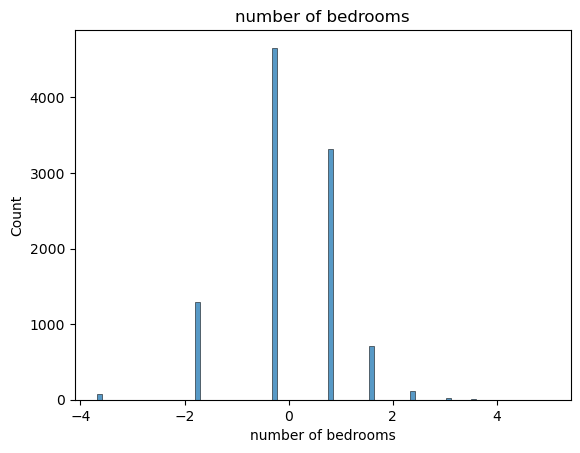

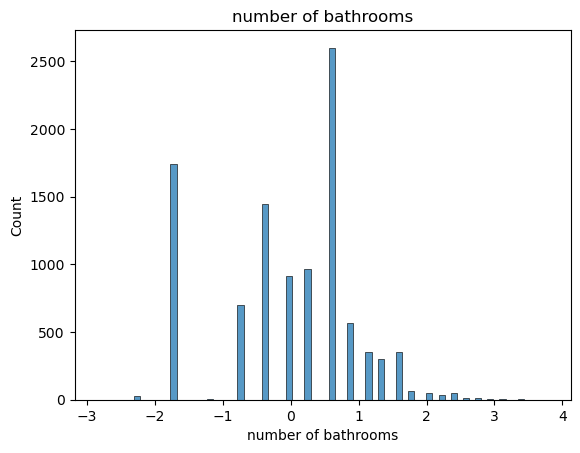

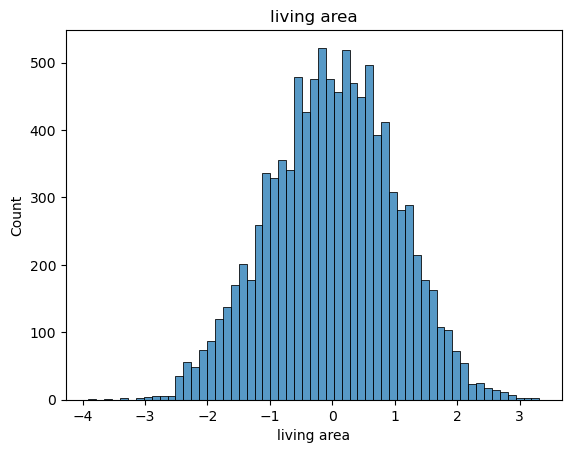

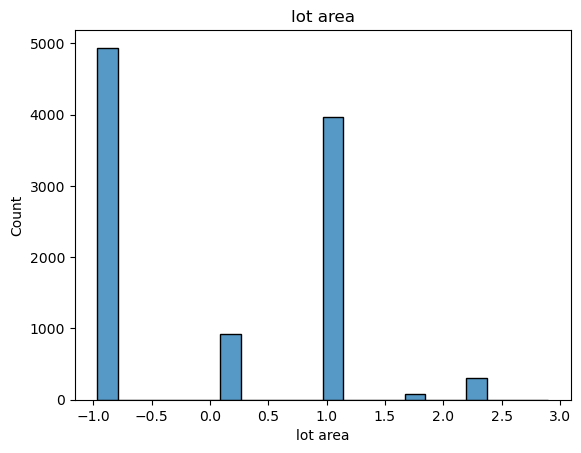

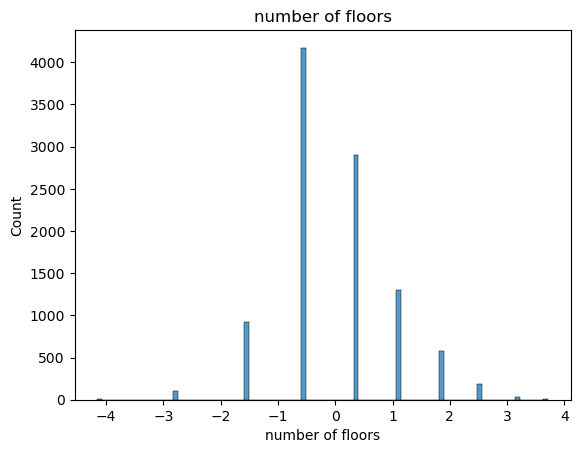

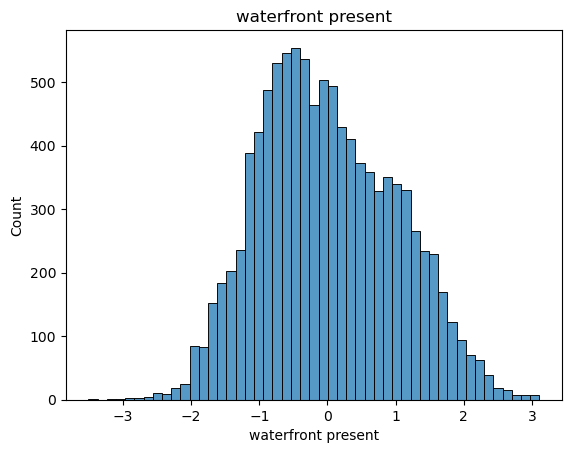

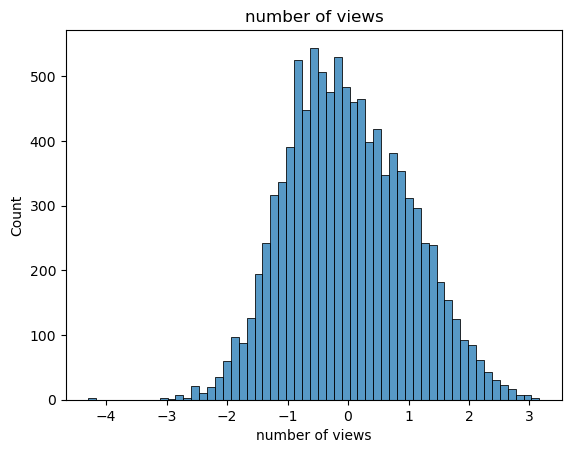

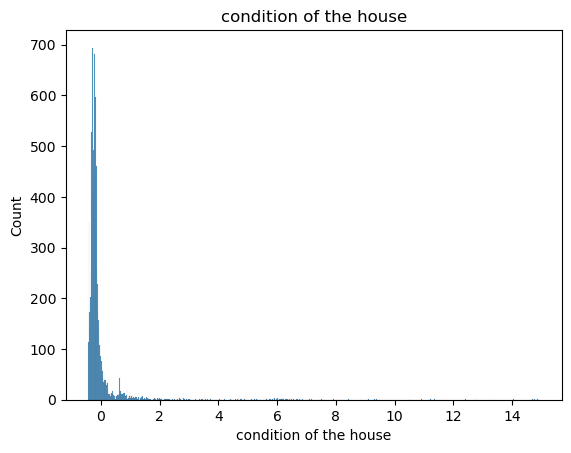

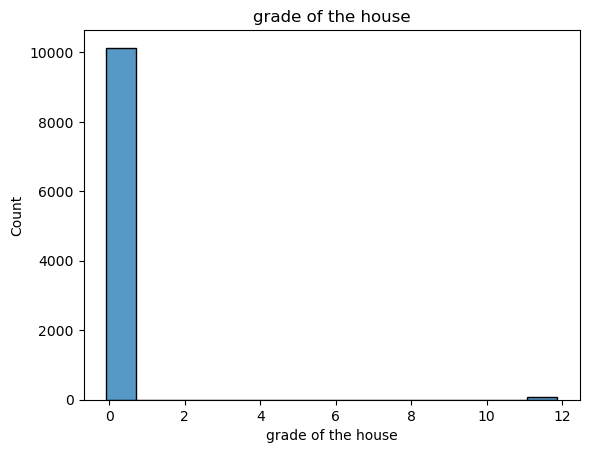

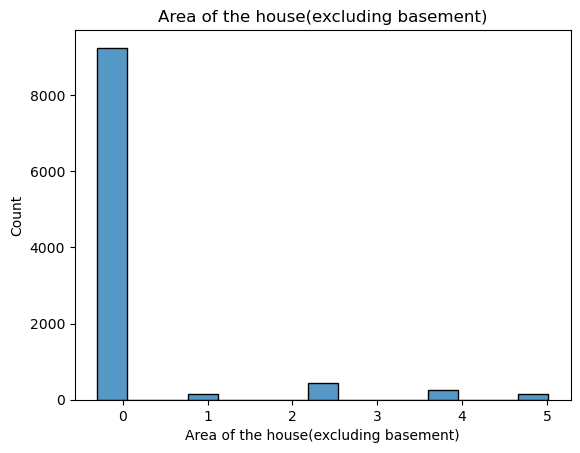

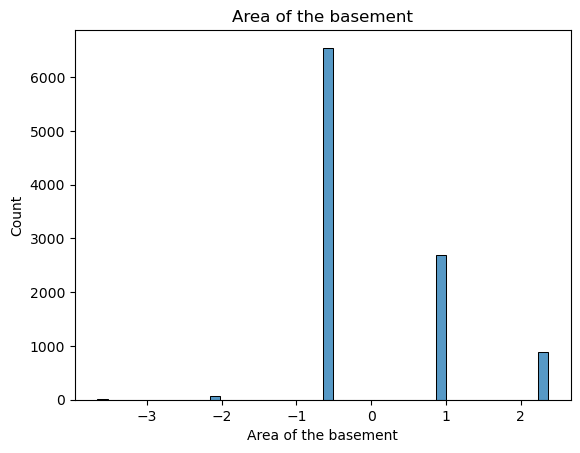

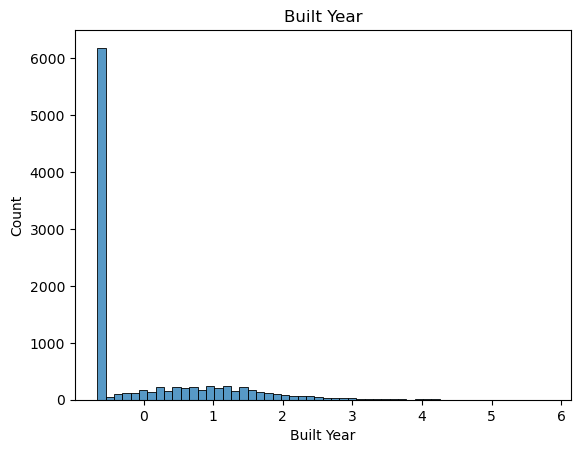

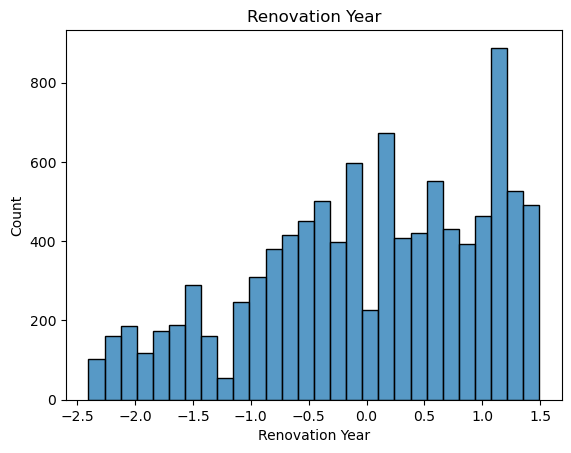

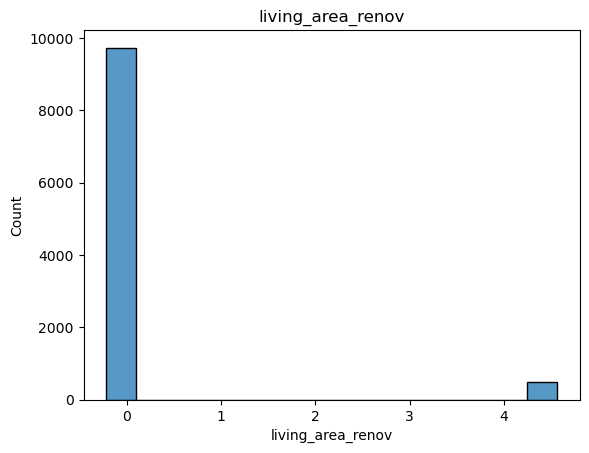

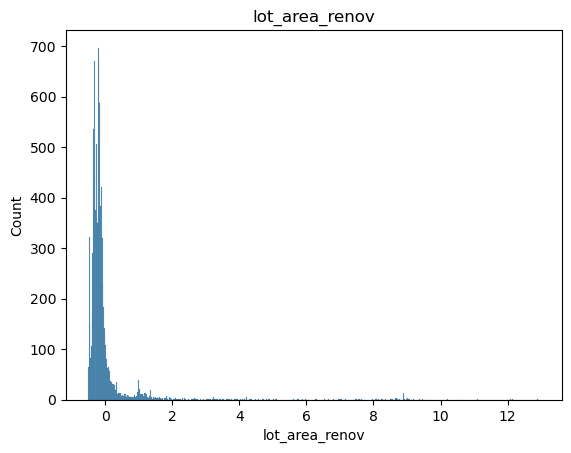

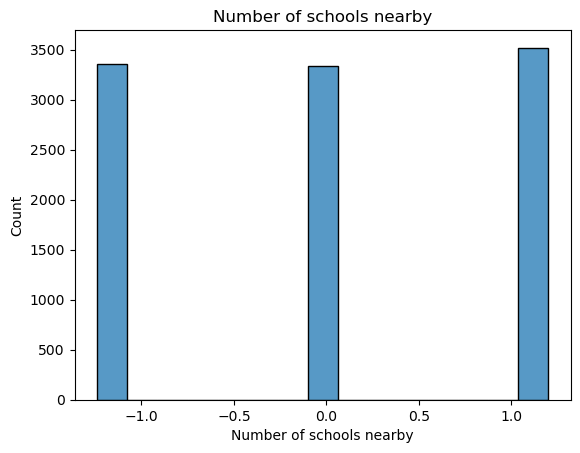

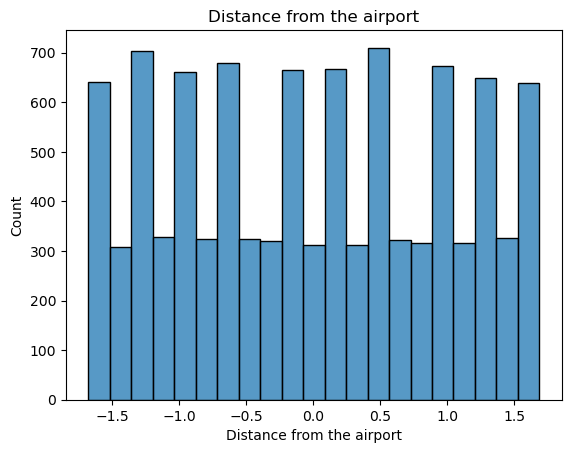

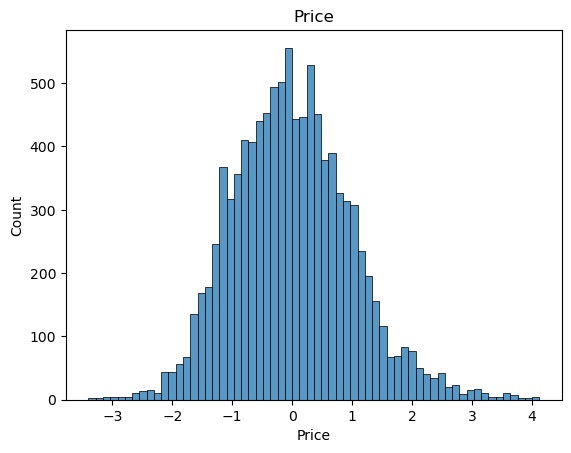

In [95]:
#checking skewness after applying transformation
skewness = main_df.select_dtypes(include='number').skew()
skewness_types = skewness.apply(skew_type)
print(skewness_types)
#plotting the dataframe after performing log Transformation and Standardization
attributes=main_df.columns
for i in attributes:
    sns.histplot(main_df[i],bins='auto')
    plt.title(i)
    plt.show()


In [96]:
#feature data columns is being converted to tensors and stored in x_train
x_train_transformed_=torch.from_numpy(x_train_transformed).float()
#target data column is being converted to tensors and stored in y_train
y_train_transformed_ = torch.from_numpy(y_train_transformed.reshape(-1, 1)).float()
#feature data columns is being converted to tensors and stored in x_test
x_test_transformed_=torch.from_numpy(x_test_transformed).float()
#target data column is being converted to tensors and stored in y_test
y_test_transformed_ = torch.from_numpy(y_test_transformed.reshape(-1, 1)).float()
#feature data columns is being converted to tensors and stored in x_val
x_val_transformed_=torch.from_numpy(x_val_transformed).float()
#target data column is being converted to tensors and stored in y_val
y_val_transformed_ = torch.from_numpy(y_val_transformed.reshape(-1, 1)).float()

In [97]:
#Create Dataset also broadcasting the target column to the similar dimension as feature columns
train_set=TensorDataset(x_train_transformed_,y_train_transformed_)
test_set=TensorDataset(x_test_transformed_,y_test_transformed_)
val_set=TensorDataset(x_val_transformed_,y_val_transformed_)

In [98]:
    #for reproduciblity
    torch.manual_seed(40)
    # Create data loader for training data — batches the data and shuffles it
    train_loader = DataLoader(train_set, batch_size=128,shuffle=True)
    
    # Create data loader for testing data — batches the data, no need to shuffle
    test_loader = DataLoader(test_set,batch_size=64,shuffle=False)
    
    # Create data loader for validation data — batches the data, no need to shuffle
    val_loader = DataLoader(val_set,batch_size=64,shuffle=False)


In [99]:
# Reusable Class wiht layer structure has been defined here
class HiddenLayer(nn.Module):
    def __init__(self,NumNeurons,NumOutput,DropoutRate):
        super().__init__()
        #first layer and input layer
        self.Layer=nn.Linear(NumNeurons,out_features=NumOutput)
        #batch normalization layer
        self.batchnorm=nn.BatchNorm1d(NumOutput)
        #relu activation function layer
        self.activation=nn.ReLU()
        #dropout layer
        self.dropout=nn.Dropout1d(p=DropoutRate)
    #defining forward method for reusable class
      #forward method is defined
    def forward(self,x):
        x=self.Layer(x)
        x=self.batchnorm(x)
        x=self.activation(x)
        x=self.dropout(x)
        return x
# Building my main model class 
class HousePricePrediction(nn.Module):
    #calling initiator with required parameters
    def __init__(self,num_inputs,num_out_features):
        #parent class initiator method is being called
        super().__init__()
        # Define InputLayer
        self.inputlayer=nn.Linear(in_features=num_inputs,out_features=200) 
        # Define Hidden Layers
        self.hidden1=HiddenLayer(200,50,0.1)
        self.hidden2=HiddenLayer(50,150,0.3)
        self.hidden3=HiddenLayer(150,100,0.2)
        self.hidden4=HiddenLayer(100,50,0.2)
        self.hidden5=HiddenLayer(50,30,0.1)
        self.hidden6=HiddenLayer(30,20,0.0)
        #last final layer, the output layer
        self.outputlayer=nn.Linear(20,out_features=num_out_features)
    #forward method is defined
    def forward(self,x):
        x=self.inputlayer(x)
        x=self.hidden1(x)
        x=self.hidden2(x)
        x=self.hidden3(x)
        x=self.hidden4(x)
        x=self.hidden5(x)
        x=self.hidden6(x)
        x=self.outputlayer(x)
        return x
    #train_model method is defined
    def train_model(self,train_loader,val_loader,LearningRate,RegularizationTerm,num_epochs):
        ## train loss list and val loss list are defined here
        train_loss=[]
        val_loss=[]
        #set it on training mode
        self.train()
        # Choose device to run the model on: GPU if available, otherwise CPU
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        
        # Move the model to the selected device (GPU or CPU)
        self.to(self.device)
    
        # Define the loss function to measure the model’s performance (MSE is used for regression problems)
        criterion = nn.SmoothL1Loss()
    
        # Defined the optimizer
        self.optimizer = optim.Adam(self.parameters(), lr=LearningRate,weight_decay=RegularizationTerm)
          #Defined no epochs
        self.num_epochs = epochs
        
        # Start training loop for the specified number of epochs
        for epoch in range(self.num_epochs):
            #Defined Total loss
            train_loss_per_epochs=0.0
            # Loop over each batch in the training data using data_loader
            for X, Y in train_loader:
                # Move the batch data (features and labels) to the same device as the model
                X, Y = X.to(self.device), Y.to(self.device)
                
                # Make predictions with the current model
                outputs = self(X)
                        
                # Calculate the loss between predictions and actual labels
                loss = criterion(outputs, Y)
                
                # Clear the previous gradients (important before backpropagation)
                self.optimizer.zero_grad()
                
                # Perform backpropagation to compute gradients
                loss.backward()
                
                # Update model weights using the optimizer
                self.optimizer.step()
                #updating total loss
                train_loss_per_epochs+=loss.item()
                
            #calculating the training loss
            train_loss_per_epochs = (train_loss_per_epochs / len(train_loader))
            
                # Set the model to evaluation mode (disables dropout, etc.)
            self.eval()
            # Initialize variable to keep track of total loss on the validation set
            val_loss_per_epochs = 0.0
        
            # Disable gradient calculation since we are only evaluating the model
            with torch.no_grad():
                # Loop over each batch in the validation data
                for inputs, targets in val_loader:
                    # Move input and target data to the correct device
                    inputs, targets = inputs.to(self.device), targets.to(self.device)
    
                    # Define the loss function to measure the model’s performance (MSE is used for regression problems)
                    criterion = nn.SmoothL1Loss()
                  
                    # Make predictions on the validation data
                    predictions = self(inputs)
                    
                    # Calculate the loss for this batch
                    loss = criterion(predictions, targets)
                    
                    # Add this batch's loss to the total validation loss
                    val_loss_per_epochs += loss.item()
    
                # Calculate the average loss across all validation batches
                val_loss_per_epochs = (val_loss_per_epochs / len(val_loader))
                 #printing train and val loss per epochs
                print(f"Epoch [{epoch+1}/{num_epochs}] || Train_Loss: {train_loss_per_epochs:.4f} || Val_Loss: {val_loss_per_epochs:.4f}")
                ## losses after each epochs have been appened to train and validation loss list
                train_loss.append(train_loss_per_epochs)
                val_loss.append(val_loss_per_epochs)
        # Returning both train_loss and val_loss lists
        return train_loss,val_loss


In [100]:
#input size
input_size=x_train_transformed.shape[1]
#output size
output_size=1
#define number of epochs 
epochs=500
#define model object
model = HousePricePrediction(num_inputs=input_size,num_out_features=output_size)
#calling training method
train_loss,val_loss=model.train_model(train_loader=train_loader,val_loader=val_loader,LearningRate=3e-4,RegularizationTerm=0.004,num_epochs=epochs)
#model.validate_model(data_loader=val_loader)
model



Epoch [1/500] || Train_Loss: 0.3599 || Val_Loss: 0.2970
Epoch [2/500] || Train_Loss: 0.1763 || Val_Loss: 0.1532
Epoch [3/500] || Train_Loss: 0.1488 || Val_Loss: 0.1466
Epoch [4/500] || Train_Loss: 0.1448 || Val_Loss: 0.1475
Epoch [5/500] || Train_Loss: 0.1412 || Val_Loss: 0.1430
Epoch [6/500] || Train_Loss: 0.1391 || Val_Loss: 0.1429
Epoch [7/500] || Train_Loss: 0.1380 || Val_Loss: 0.1429
Epoch [8/500] || Train_Loss: 0.1376 || Val_Loss: 0.1461
Epoch [9/500] || Train_Loss: 0.1370 || Val_Loss: 0.1393
Epoch [10/500] || Train_Loss: 0.1365 || Val_Loss: 0.1429
Epoch [11/500] || Train_Loss: 0.1369 || Val_Loss: 0.1413
Epoch [12/500] || Train_Loss: 0.1360 || Val_Loss: 0.1419
Epoch [13/500] || Train_Loss: 0.1369 || Val_Loss: 0.1398
Epoch [14/500] || Train_Loss: 0.1364 || Val_Loss: 0.1380
Epoch [15/500] || Train_Loss: 0.1362 || Val_Loss: 0.1402
Epoch [16/500] || Train_Loss: 0.1366 || Val_Loss: 0.1464
Epoch [17/500] || Train_Loss: 0.1371 || Val_Loss: 0.1420
Epoch [18/500] || Train_Loss: 0.1366 || 


KeyboardInterrupt



## After trying multiple loss functions [specific to regression problem] and optimization functions, smoothL1Loss gives the best value along with adam optimization function

In [101]:
#function to show both validation and training loss
def show_loss(epochs,train,val):
    plt.plot(range(1, epochs + 1), train, marker='o',label="Training Loss",color='g')
    plt.plot(range(1, epochs +1 ), val, marker='s', label="Validation Loss",color='r')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss over Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

In [102]:
# function to plot prediction
def PlotPrediction(y,output):
    plt.scatter(y.cpu(),y.cpu(),marker='o',color='b',label="Actual")
    plt.scatter(output.cpu(),output.cpu(),marker='s',color='r',label='Predicted')
    plt.title('Prediction')
    plt.show()

In [103]:
show_loss(epochs,train_loss,val_loss)

NameError: name 'train_loss' is not defined

In [32]:
#saving it after hypertuning the mode
#torch.save(model.state_dict(),'HousePricePrediction.pth')


In [104]:
input_size=x_train.shape[1]
output_size=1
mm = HousePricePrediction(num_inputs=input_size,num_out_features=output_size)
state=torch.load("HousePricePrediction.pth")
mm.load_state_dict(state)
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
mm.to(device)
mm.eval()

HousePricePrediction(
  (inputlayer): Linear(in_features=17, out_features=200, bias=True)
  (hidden1): HiddenLayer(
    (Layer): Linear(in_features=200, out_features=50, bias=True)
    (batchnorm): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
    (dropout): Dropout1d(p=0.1, inplace=False)
  )
  (hidden2): HiddenLayer(
    (Layer): Linear(in_features=50, out_features=150, bias=True)
    (batchnorm): BatchNorm1d(150, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
    (dropout): Dropout1d(p=0.3, inplace=False)
  )
  (hidden3): HiddenLayer(
    (Layer): Linear(in_features=150, out_features=100, bias=True)
    (batchnorm): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (activation): ReLU()
    (dropout): Dropout1d(p=0.2, inplace=False)
  )
  (hidden4): HiddenLayer(
    (Layer): Linear(in_features=100, out_features=50, bias=True)
    (batchnorm): BatchNo

In [106]:
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
mm.eval()  # Set model to eval mode
x_tensor = torch.tensor(x_test_transformed,dtype=torch.float32).to(device)
#criterion=nn.SmoothL1Loss()

with torch.no_grad():
    #for x,y in val_loader:
        #x,y=x.to(device),y.to(device)
        torch.manual_seed(42)
        output = mm(x_tensor)  
        #loss=criterion(output,y.to(device))
        print(output)

tensor([[ 0.4864],
        [-0.2352],
        [ 0.3909],
        ...,
        [ 0.8165],
        [-0.8980],
        [-0.8819]], device='cuda:0')


In [118]:
x_test[:3]

,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,grade of the house,Area of the house(excluding basement),Area of the basement,Built Year,Renovation Year,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport
10839,4,2.25,2010,7200,1.0,0,1,4,8,1010,1000,1950,0,2010,7200,2,68
7283,4,2.50,2210,7214,2.0,0,0,3,8,2210,0,2003,0,2270,7246,3,76
8220,3,3.00,2060,1850,2.0,0,0,3,8,1400,660,2007,0,1910,2951,3,56


In [107]:
output_np = output.detach().cpu().numpy()
output = preprocessor_Y.inverse_transform(output_np)
output=np.expm1(output)

In [108]:
out=output
out

array([[595873.2 ],
       [408457.28],
       [566844.4 ],
       ...,
       [708247.7 ],
       [288727.8 ],
       [291171.38]], shape=(3062, 1), dtype=float32)

AttributeError: 'numpy.ndarray' object has no attribute 'cpu'

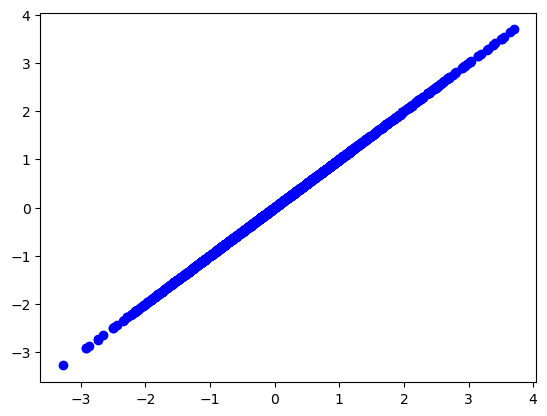

In [109]:
PlotPrediction(y_test_transformed_.to(device),output)

In [110]:
columns=x_train_.columns